In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
Datasheet=[]
for i in range(1,9):
    Datasheet.append(pd.read_excel('Data\PartB\Dataset_PartB.xlsx','Run'+str(i)))

# Deformation

In [44]:
Area_mean=np.zeros(8)
Area_std=np.zeros(8)
Area_all=[]

Perimeter_mean=np.zeros(8)
Perimeter_std=np.zeros(8)

Deformation_all=[]
Deformation_mean=np.zeros(8)
Deformation_std=np.zeros(8)
for i in range(8):
    Area=np.array(Datasheet[i]['Area'])*((10/30)**2)
    Perimeter=np.array(Datasheet[i]['Perim.'])*10/30
    
    Area_all.append(Area)
    Area_mean[i]=np.mean(Area)
    Area_std[i]=np.std(Area)
    
    Perimeter_mean[i]=np.mean(Perimeter)
    Perimeter_std[i]=np.std(Perimeter)
    
    Deformation=1-(2*np.sqrt(np.pi*Area))/Perimeter
    Deformation_all.append(Deformation)
    Deformation_mean[i]=np.mean(Deformation)
    Deformation_std[i]=np.std(Deformation)

Text(0, 0.5, 'Deformation')

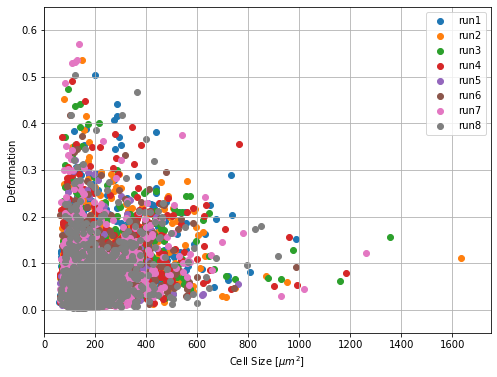

In [51]:
plt.figure(figsize=(8,6))
plt.ylim(-0.05, 0.65) 
plt.xlim(0, 1750)

for i in range(8):
    plt.scatter(Area_all[i],Deformation_all[i],label='run'+str(i+1))

plt.grid()
plt.legend()    
plt.xlabel(r'Cell Size $[\mu m^2]$')
plt.ylabel('Deformation')

Text(0, 0.5, 'Deformation')

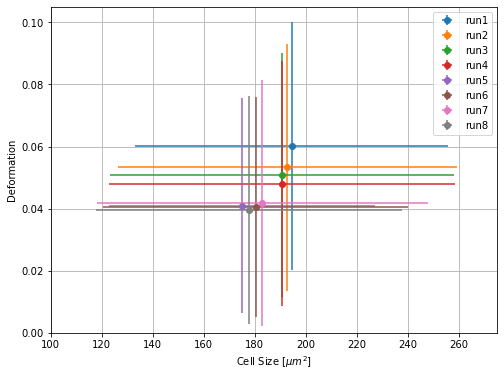

In [42]:
plt.figure(figsize=(8,6))
plt.ylim(0, 0.105) 
plt.xlim(100, 275)


for i in range(8):
    plt.errorbar(Area_mean[i],Deformation_mean[i],xerr=Area_std[i],yerr=Deformation_std[i], fmt="o", label='run'+str(i+1))

plt.legend()
plt.grid()
plt.xlabel(r'Cell Size $[\mu m^2]$')
plt.ylabel('Deformation')
#plt.savefig('defvscell.png')

# Bar graphs

In [52]:
X=[i for i in range(1,9)]

## Area

Text(0, 0.5, 'Relative difference')

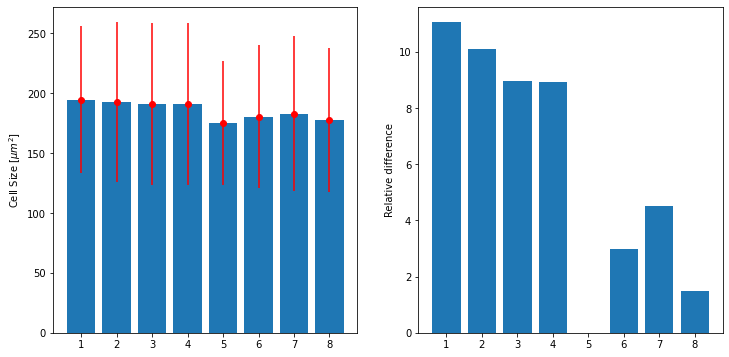

In [59]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(X,Area_mean)
plt.errorbar(X,Area_mean,yerr=Area_std, fmt="o", color="r")
plt.ylabel(r'Cell Size $[\mu m^2]$')
plt.subplot(122)
plt.bar(X,(Area_mean-np.min(Area_mean))/np.min(Area_mean)*100)
plt.ylabel('Relative difference')

## Perimeter

Text(0, 0.5, 'Relative difference')

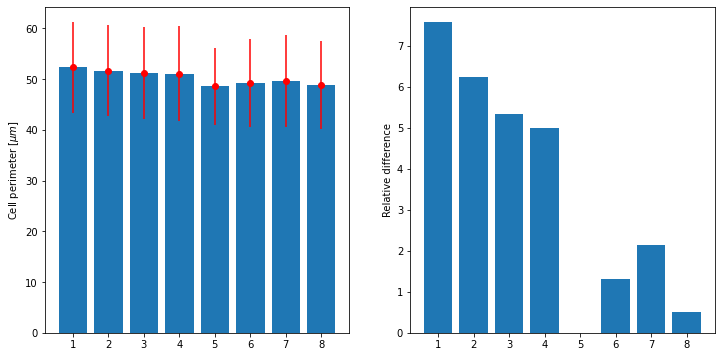

In [98]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(X,Perimeter_mean)
plt.errorbar(X,Perimeter_mean,yerr=Perimeter_std, fmt="o", color="r")
plt.ylabel(r'Cell perimeter $[\mu m]$')
plt.subplot(122)
plt.bar(X,(Perimeter_mean-np.min(Perimeter_mean))/np.min(Perimeter_mean)*100)
plt.ylabel('Relative difference')

## Height

In [96]:
Height=np.zeros(8)
Height_std=np.zeros(8)
for i in range(8):
    Height[i]=np.mean(Datasheet[i]['Height'])
    Height_std[i]=np.std(Datasheet[i]['Height'])

Text(0, 0.5, 'Relative difference')

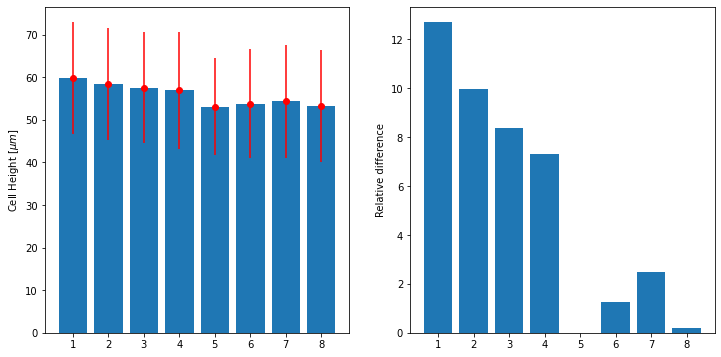

In [97]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(X,Height)
plt.errorbar(X,Height,yerr=Height_std, fmt="o", color="r")
plt.ylabel(r'Cell Height $[\mu m]$')
plt.subplot(122)
plt.bar(X,(Height-np.min(Height))/np.min(Height)*100)
plt.ylabel('Relative difference')

## Width

In [94]:
Width=np.zeros(8)
Width_std=np.zeros(8)
for i in range(8):
    Width[i]=np.mean(Datasheet[i]['Width'])
    Width_std=np.std(Datasheet[i]['Width'])

Text(0, 0.5, 'Relative difference')

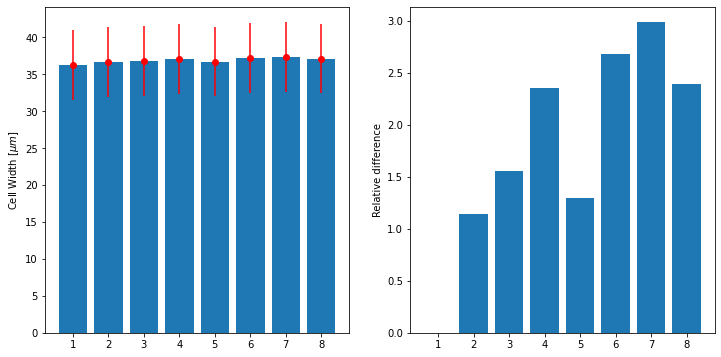

In [95]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(X,Width)
plt.errorbar(X,Width,yerr=Width_std, fmt="o", color="r")
plt.ylabel(r'Cell Width $[\mu m]$')
plt.subplot(122)
plt.bar(X,(Width-np.min(Width))/np.min(Width)*100)
plt.ylabel('Relative difference')

## Aspect ratio

In [66]:
AR=np.zeros(8)
AR_std=np.zeros(8)
for i in range(8):
    AR[i]=np.mean(Datasheet[i]['AR'])
    AR_std[i]=np.std(Datasheet[i]['AR'])

Text(0, 0.5, 'Relative difference')

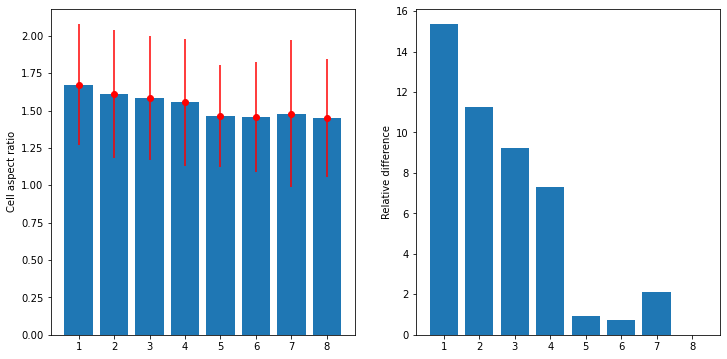

In [92]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(X,AR)
plt.errorbar(X,AR,yerr=AR_std, fmt="o", color="r")
plt.ylabel('Cell aspect ratio')
plt.subplot(122)
plt.bar(X,(AR-np.min(AR))/np.min(AR)*100)
plt.ylabel('Relative difference')

# Drawing the ellipses

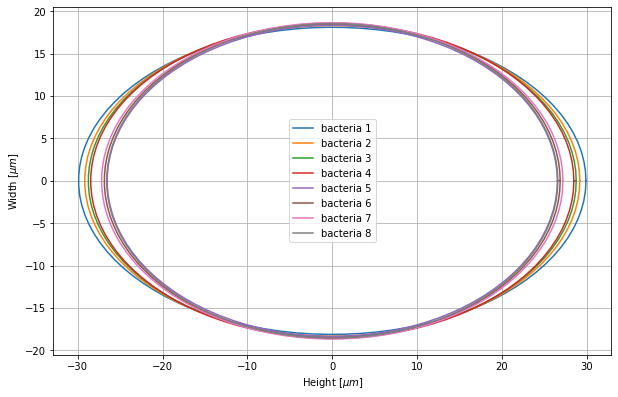

In [73]:
t = np.linspace(0, 2*np.pi, 100)

fig_ellipse=plt.figure(figsize=(10,10))
for i in range(8):
    W=Width[i]/2
    H=Height[i]/2
    plt.plot(H*np.cos(t),W*np.sin(t),label='bacteria '+str(i+1))

    
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlabel(r'Height $[\mu m]$')
plt.ylabel(r'Width $[\mu m]$')
plt.legend()

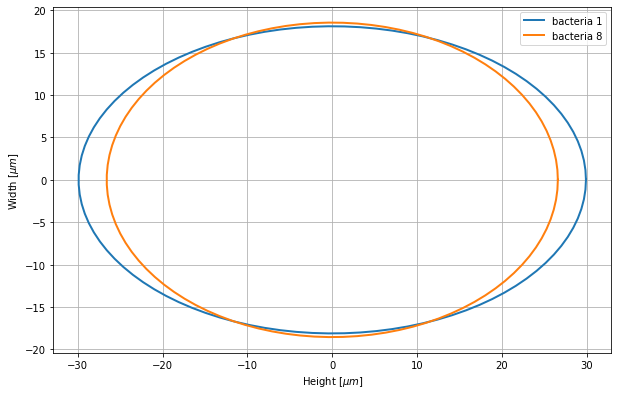

In [75]:
fig_ellipse=plt.figure(figsize=(10,10))
for i in [0,7]:
    W=Width[i]/2
    H=Height[i]/2
    plt.plot(H*np.cos(t),W*np.sin(t),label='bacteria '+str(i+1),linewidth=2)

    
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlabel(r'Height $[\mu m]$')
plt.ylabel(r'Width $[\mu m]$')
plt.legend()

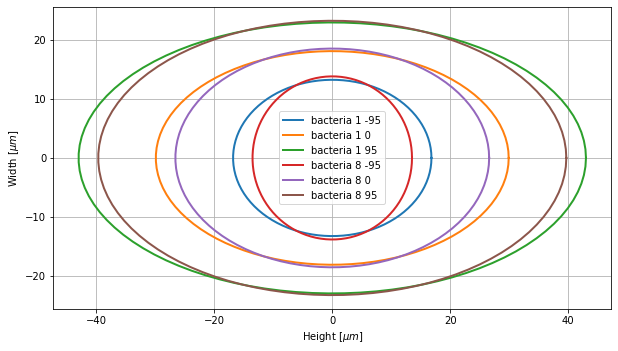

In [76]:
W_1_m=Width[0]
H_1_m=Height[0]
std_1_H=np.std(Datasheet[0]['Height'])
std_1_W=np.std(Datasheet[0]['Width'])

W_8_m=Width[7]
H_8_m=Height[7]
std_8_H=np.std(Datasheet[7]['Height'])
std_8_W=np.std(Datasheet[7]['Width'])

#Confidence interval at 95%
W_1=[W_1_m -2*std_1_W ,W_1_m,W_1_m + 2*std_1_W]
H_1=[H_1_m -2*std_1_H ,H_1_m,H_1_m + 2*std_1_H]

W_8=[W_8_m -2*std_8_W ,W_8_m,W_8_m + 2*std_8_W]
H_8=[H_8_m -2*std_8_H ,H_8_m,H_8_m + 2*std_8_H]


fig_ellipse=plt.figure(figsize=(10,10))
for i in range(3):
    W=W_1[i]/2
    H=H_1[i]/2
    if i==0:
        interval='-95'
    elif i==1:
        interval='0'
    else:
        interval='95'
    plt.plot(H*np.cos(t),W*np.sin(t),label='bacteria 1 ' + interval,linewidth=2)

    
for i in range(3):
    W=W_8[i]/2
    H=H_8[i]/2
    if i==0:
        interval='-95'
    elif i==1:
        interval='0'
    else:
        interval='95'
    plt.plot(H*np.cos(t),W*np.sin(t),label='bacteria 8 ' + interval,linewidth=2)

ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.grid(True)
plt.xlabel(r'Height $[\mu m]$')
plt.ylabel(r'Width $[\mu m]$')
plt.legend()

The deformation is conserved across the confidence interval

# Radius and poisson's ratio

In [84]:
Radius_all=[]
Radius_mean=np.zeros(8)
Radius_std=np.zeros(8)

poisson_coefficient_all=[]
poisson_coefficient_mean=np.zeros(8)
poisson_coefficient_std=np.zeros(8)

    
for i in range(8):
    Height=np.array(Datasheet[i]['Height'])*10/30
    Width=np.array(Datasheet[i]['Width'])*10/30
    
    Radius=np.sqrt(Height*Width/4)
    Radius_all.append(Radius)
    Radius_mean[i]=np.mean(Radius)
    Radius_std[i]=np.std(Radius)    

    poisson_coefficient=[]
    for j in range(len(Radius)):
        if 2*Radius[j]-Height[j]!=0:
            poisson_coefficient.append((2*Radius[j]-Width[j])/(Height[j]-2*Radius[j]))
    
    poisson_coefficient_all.append(poisson_coefficient)
    poisson_coefficient_mean[i]=np.mean(poisson_coefficient)
    poisson_coefficient_std[i]=np.std(poisson_coefficient)

Text(0, 0.5, 'Relative difference')

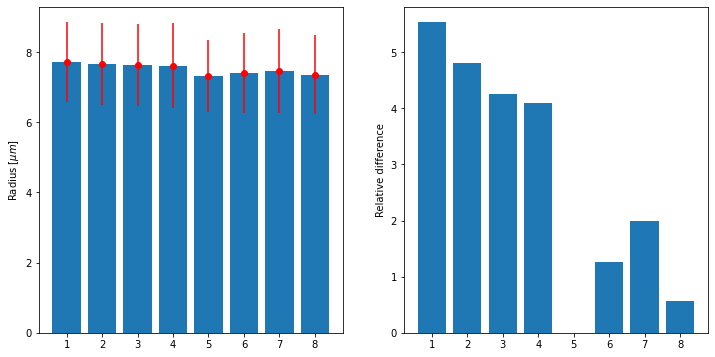

In [91]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(X,Radius_mean)
plt.errorbar(X,Radius_mean,yerr=Radius_std, fmt="o", color="r")
plt.ylabel(r'Radius $[\mu m]$')
plt.subplot(122)
plt.bar(X,(Radius_mean-np.min(Radius_mean))/np.min(Radius_mean)*100)
plt.ylabel('Relative difference')

Text(0, 0.5, 'Relative difference')

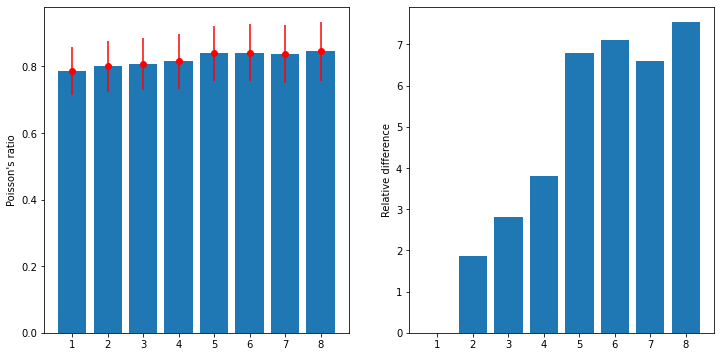

In [90]:
plt.figure(figsize=(12,6))
plt.subplot(121)
plt.bar(X,poisson_coefficient_mean)
plt.errorbar(X,poisson_coefficient_mean,yerr=poisson_coefficient_std, fmt="o", color="r")
plt.ylabel("Poisson's ratio")
plt.subplot(122)
plt.bar(X,(poisson_coefficient_mean-np.min(poisson_coefficient_mean))/np.min(poisson_coefficient_mean)*100)
plt.ylabel('Relative difference')